# Library Imports and Setup

In [147]:
# Install the mxnet library required for certain functionalities in SageMaker
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install tabulate
# %pip install mxnet
# %pip install tarfile
# %pip install openpyxl


# AWS SageMaker and Boto3
#import sagemaker
#from sagemaker import get_execution_role, KMeans
#from sagemaker.image_uris import retrieve
#from sagemaker.model import Model
#from sagemaker.predictor import Predictor
#from sagemaker.serializers import CSVSerializer
#import boto3
#from botocore.exceptions import ClientError

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Libraries
import tarfile
#import mxnet as mx
import datetime
import json
import time
from tabulate import tabulate
import numpy as np
import openpyxl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder

In [148]:
sage_on = False

# Load and Preprocess the Dataset

In [149]:
# Step 1: Load the Dataset
# Load the mall customers dataset from a CSV file into a Pandas DataFrame.
# This allows for easy data manipulation and analysis.
df_cc = pd.read_csv('credit_card_customer_data.csv')
df_cc.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [150]:
# pick columns to one hot encode
print(df_cc.columns)

# drop irrelevant columns
#df_socials.drop(['Post ID', 'Post Content', 'Post Timestamp', 'Date', 'Time', 'Audience Continent', 'Audience Interests',
                 #'Campaign ID', 'Influencer ID'], axis=1, inplace=True)

# pick columns to encode
#to_encode = ['Platform', 'Post Type', 'Weekday Type', 'Time Periods', 'Age Group', 'Audience Gender', 
       #'Audience Location', 'Sentiment']

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


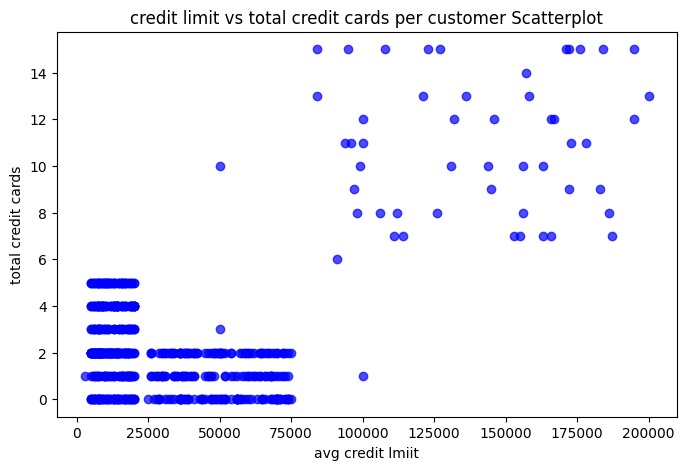

In [151]:

# Sort countries alphabetically
#df_socials_vis = df_socials.sort_values(by='Audience Location')

# Assign numerical values based on sorted order
#countries = df_socials_vis['Audience Location'].unique()
#country_mapping = {country: idx for idx, country in enumerate(countries)}

# Map countries to x-axis positions
#df_socials_vis['country_position'] = df_socials_vis['Audience Location'].map(country_mapping)

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_cc['Avg_Credit_Limit'], df_cc['Total_visits_online'], color='blue', alpha=0.7)

# Formatting
plt.xlabel('avg credit lmiit')
plt.ylabel('total credit cards')

plt.title('credit limit vs total credit cards per customer Scatterplot')

plt.show()

In [152]:
# Initialize OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap

# Fit and transform categorical columns
#encoded_array = encoder.fit_transform(df_socials[to_encode])

# Create a DataFrame with new column names
#encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(to_encode))

# Concatenate with the original DataFrame (excluding the original categorical columns)
#df_socials_encoded = pd.concat([df_socials.drop(columns=to_encode), encoded_df], axis=1)

# Display the encoded DataFrame
#print(df_socials_encoded)

#print(df_socials.head())

# Create a 3D Scatter Plot

C:\Users\anike\AppData\Local\Temp\ipykernel_15812\115151246.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


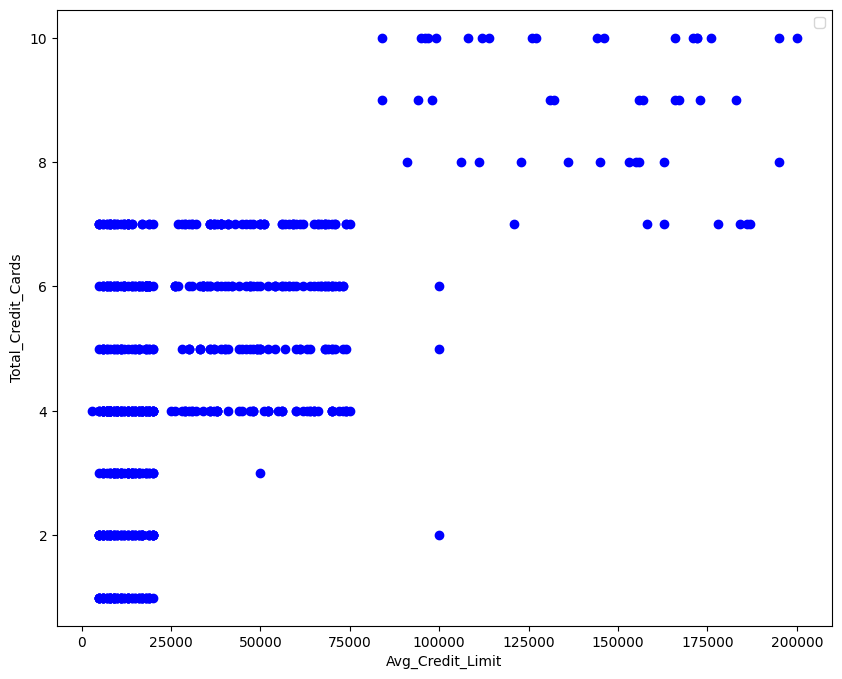

In [ ]:
# Import the required libraries for data visualization


x_axis = 'Avg_Credit_Limit'
y_axis = 'Total_Credit_Cards'
z_axis = 'Total_visits_online'

# Step 1: Create a 3D scatter plot
# Initialize a figure with a specific size for the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot to the figure
# '111' indicates 1x1 grid, first subplot. 'projection='3d'' is used to create a 3D projection.
ax = fig.add_subplot(111)

# Step 2: Plot data points, colored by gender
# Scatter plot for male customers in blue
# Filters the DataFrame for male customers and plots their age, annual income, and spending score.
ax.scatter(df_cc['Avg_Credit_Limit'], df_cc['Total_Credit_Cards'], c='blue')



# Step 3: Set labels and legend
# Adding axis labels and a legend to make the plot more informative.
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
#ax.set_zlabel(z_axis)
#ax.legend()

# Display the plot
plt.show()

C:\Users\anike\AppData\Local\Temp\ipykernel_15812\276804778.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


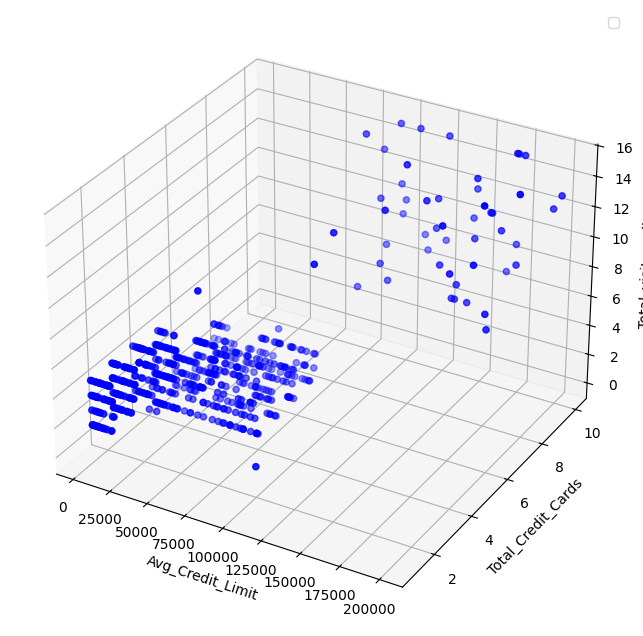

In [ ]:
# Import the required libraries for data visualization


x_axis = 'Avg_Credit_Limit'
y_axis = 'Total_Credit_Cards'
z_axis = 'Total_visits_online'

# Step 1: Create a 3D scatter plot
# Initialize a figure with a specific size for the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot to the figure
# '111' indicates 1x1 grid, first subplot. 'projection='3d'' is used to create a 3D projection.
ax = fig.add_subplot(111, projection='3d')

# Step 2: Plot data points, colored by gender
# Scatter plot for male customers in blue
# Filters the DataFrame for male customers and plots their age, annual income, and spending score.
ax.scatter(df_cc['Avg_Credit_Limit'],
           df_cc['Total_Credit_Cards'],
           df_cc['Total_visits_bank'],
           c='blue')

#

# Step 3: Set labels and legend
# Adding axis labels and a legend to make the plot more informative.
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_zlabel(z_axis)
#ax.legend()

# Display the plot
plt.show()

# SageMaker Setup and Configuration

In [155]:
if sage_on:    
    # Initialize a SageMaker Session
    # A SageMaker Session helps in managing the interactions with the AWS SageMaker service, such as creating and training models, and deploying endpoints.
    sagemaker_session = sagemaker.Session()

    # Retrieve the IAM role
    # The IAM role is required by SageMaker to access AWS resources (e.g., S3 buckets) on your behalf.
    role = get_execution_role()

    # Identify the AWS Region of the SageMaker Session
    # This information is used to ensure that resources are created in the same region as the SageMaker session.
    region = sagemaker_session.boto_region_name

    # Create Boto3 Clients for S3 and SageMaker
    # These clients enable programmatic access to S3 and SageMaker services for operations like uploading data and creating training jobs.
    s3_client = boto3.client('s3')
    sagemaker_client = boto3.client('sagemaker')

    # Retrieve the Docker image URI for the KMeans algorithm
    # This URI is specific to the AWS region and is used to pull the appropriate image for training.
    image_uri = retrieve('kmeans', region)

    # Define the Default S3 Bucket for SageMaker
    # SageMaker requires an S3 bucket to store training data, models, and outputs. Here, we use the session's default bucket.
    bucket = sagemaker_session.default_bucket()

    # Set the S3 Prefix for Storing Data
    # The prefix is used to organize the data in the bucket, making it easier to manage and locate.
    prefix = 'sagemaker/mall/kmeans-all'

    # Output the IAM Role ARN and AWS Region for verification
    print("Execution Role ARN:", role)
    print("AWS Region:", region)
else:
    print('sagemaker off')

sagemaker off


# KMeans Model Training

In [156]:
# Define the range of k values for the KMeans clustering
# This range will determine how many models we train, each with a different number of clusters.
k_values = range(2, 8)

# Initialize lists to keep track of the S3 paths for the trained models and their training job names.
model_paths = []
training_jobs = []

# Set the output path in the S3 bucket for the trained models
# This path will be used to store the output (model artifacts) of each training job.
output_path = f's3://{sagemaker_session.default_bucket()}/sagemaker/mall/kmeans-all/output'

# Iterate over each k value to train a separate KMeans model for that number of clusters
for k in k_values:
    # Generate a unique job name for each training job based on the k value
    job_name = f'kmeans-mall-all-k-{k}'
    
    # Initialize the KMeans estimator from SageMaker with the specific k value
    # Configuration includes instance type, number of instances, and the specified k value.
    kmeans = KMeans(
        sagemaker_session=sagemaker_session,
        role=role,
        instance_count=1,
        instance_type='ml.m5.large',
        k=k,
        output_path=output_path,
        job_name=job_name,
        feature_dim=4  # Specify the number of features in the input data
    )
    
    # Start the training job for the KMeans model
    # We use 'wait=False' to start each training job asynchronously.
    kmeans.fit(kmeans.record_set(data_np), wait=False)
    training_jobs.append((k, kmeans.latest_training_job.name))

# After initiating all training jobs, we wait for each to complete and collect their model URIs
for k, job_name in training_jobs:
    # Wait for the completion of the training job
    sagemaker_client.get_waiter('training_job_completed_or_stopped').wait(TrainingJobName=job_name)
    
    # Retrieve the S3 URI of the model artifacts for the completed training job
    training_job_description = sagemaker_client.describe_training_job(TrainingJobName=job_name)
    model_s3_uri = training_job_description['ModelArtifacts']['S3ModelArtifacts']
    model_paths.append((k, model_s3_uri))

# Print the S3 paths of the model artifacts for all trained models
# This provides a clear reference to the location of each model for further analysis or deployment.
headers = ['k Value', 'S3 Model Artifact Path']
print(tabulate(model_paths, headers=headers))

NameError: name 'sagemaker_session' is not defined

# Determine K through Elbow Plot

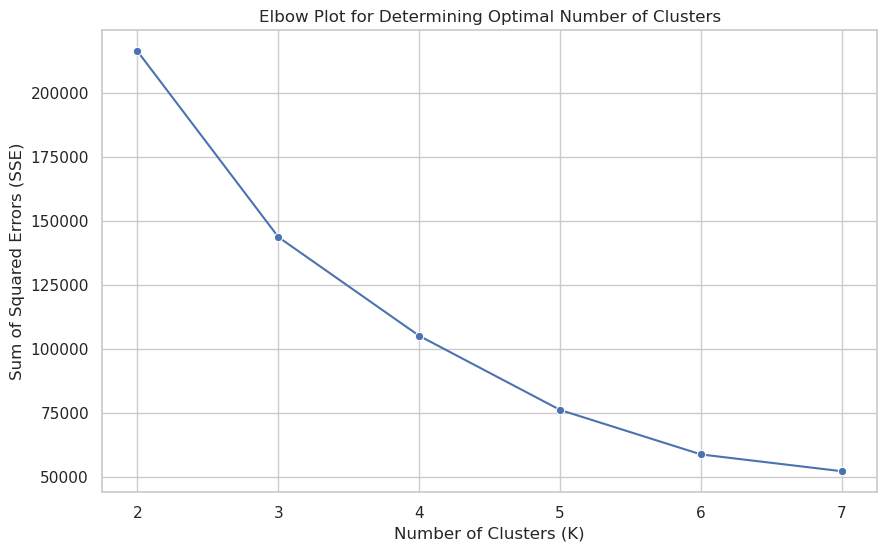

In [ ]:
# List to store the Sum of Squared Errors (SSE) for each value of K
sse_values = []

# Iterate over each trained model's path to calculate SSE
for k, model_path in model_paths:
    try:
        # Download the model artifacts from S3
        local_path = f'/tmp/model-k-{k}.tar.gz'
        s3_client.download_file(sagemaker_session.default_bucket(), model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)
        
        # Extract the model artifacts
        with tarfile.open(local_path) as tar:
            tar.extractall(path=f'/tmp/k-{k}')
        
        # Load the KMeans model parameters
        kmeans_model_params = mx.ndarray.load(f'/tmp/k-{k}/model_algo-1')
        centroids = kmeans_model_params[0].asnumpy()
        
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Determine the closest centroid for each data point
        closest_centroids = np.argmin(distances, axis=0)
        
        # Calculate SSE for this value of K
        sse = np.sum((data_np - centroids[closest_centroids])**2)
        sse_values.append(sse)
    except Exception as e:
        print(f'Error processing model for K={k}: {e}')

# Create and display the Elbow Plot using seaborn and matplotlib
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=[k for k, _ in model_paths], y=sse_values, marker='o')
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks([k for k, _ in model_paths])
plt.show()

# Determine K through using Silhouette Method

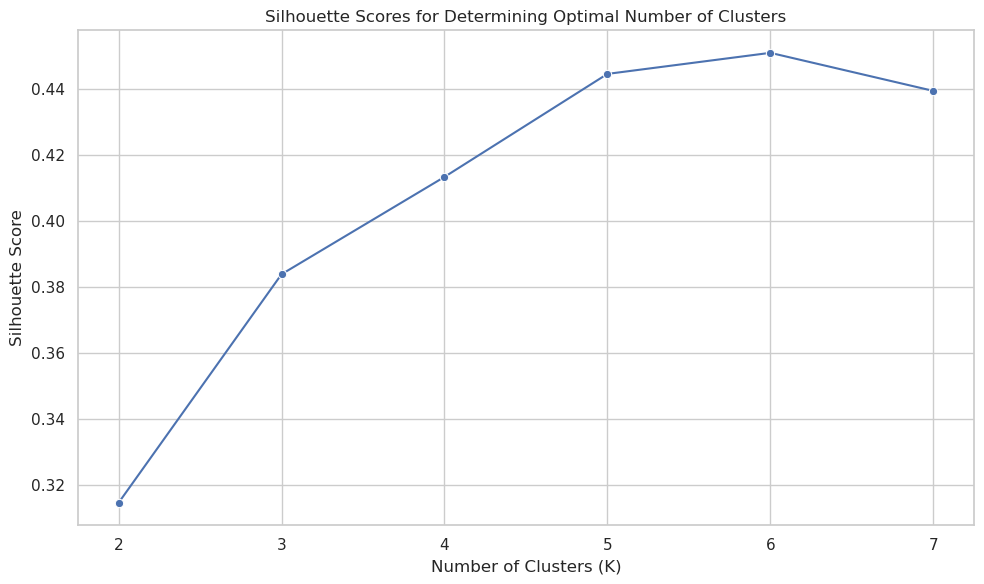

In [ ]:
# List to store the silhouette scores for each value of K
silhouette_scores = []

# Iterate over each trained model's path to calculate its silhouette score
for k, model_path in model_paths:
    try:
        # Download the model artifacts from S3
        local_path = f'/tmp/model-k-{k}.tar.gz'
        s3_client.download_file(sagemaker_session.default_bucket(), model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)
        
        # Extract the model artifacts
        with tarfile.open(local_path) as tar:
            tar.extractall(path=f'/tmp/k-{k}')
        
        # Load the KMeans model parameters
        kmeans_model_params = mx.ndarray.load(f'/tmp/k-{k}/model_algo-1')
        centroids = kmeans_model_params[0].asnumpy()
        
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Determine the closest centroid for each data point
        closest_centroids = np.argmin(distances, axis=0)
        
        # Calculate the silhouette score for this value of K
        silhouette_score_value = silhouette_score(data_np, closest_centroids)
        silhouette_scores.append(silhouette_score_value)
    except Exception as e:
        print(f'Error processing model for K={k}: {e}')

# Plot the silhouette scores for different values of K, if available
if silhouette_scores:  # Ensure the list is not empty
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=[k for k, _ in model_paths], y=silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Determining Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
    plt.show()
else:
    print("No silhouette scores to plot.")


# Visualize the centroids for the optimal K value and display the cluster assignments for each datapoint

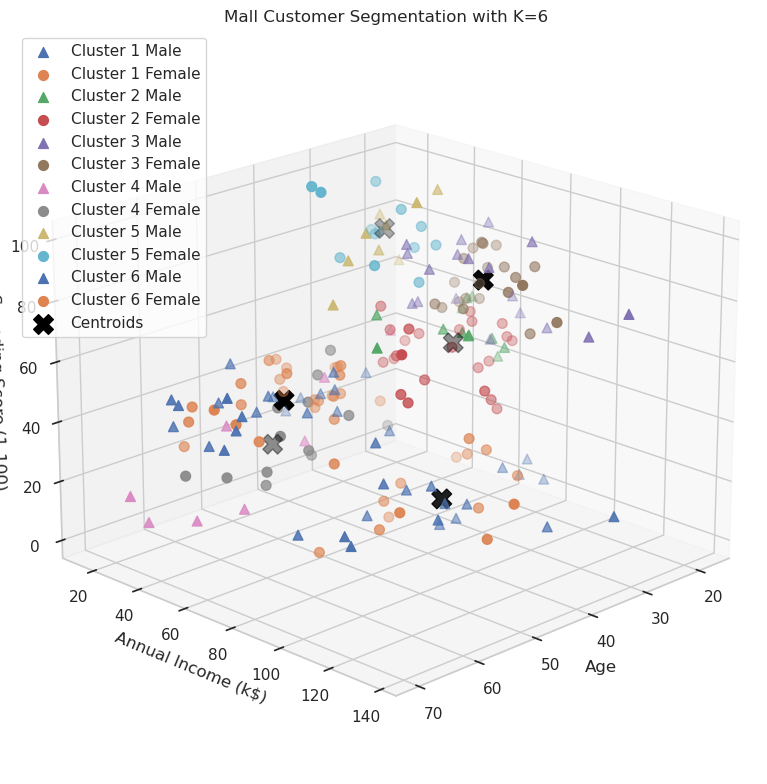

In [ ]:
# Specify the optimal number of clusters determined previously
best_k = 6

# Retrieve the model path for the best K value from the list of trained models
best_model_path = next(path for k, path in model_paths if k == best_k)

# Download the best model artifacts from S3
local_path = f'/tmp/model-k-{best_k}.tar.gz'
s3_client.download_file(bucket, best_model_path.replace(f's3://{bucket}/', ''), local_path)

# Extract the model artifacts
with tarfile.open(local_path) as tar:
    tar.extractall(path=f'/tmp/k-{best_k}')

# Load the KMeans model parameters from the extracted files
kmeans_model_params = mx.ndarray.load(f'/tmp/k-{best_k}/model_algo-1')
centroids = kmeans_model_params[0].asnumpy()

# Calculate distances from each point to the centroids and determine closest centroid for each point
distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
closest_centroids = np.argmin(distances, axis=0)

# Initialize a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points, color-coded by cluster assignment and gender
for i in range(best_k):
    cluster_points = data_np[closest_centroids == i]
    male_points = cluster_points[cluster_points[:, 0] == 1]  # Filter male points
    female_points = cluster_points[cluster_points[:, 0] == 0]  # Filter female points
    ax.scatter(male_points[:, 1], male_points[:, 2], male_points[:, 3], s=50, label=f'Cluster {i+1} Male', marker='^')
    ax.scatter(female_points[:, 1], female_points[:, 2], female_points[:, 3], s=50, label=f'Cluster {i+1} Female', marker='o')

# Plot centroids
ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 3], s=200, c='black', marker='X', label='Centroids')

# Customize the view angle for better visualization
ax.view_init(elev=20, azim=45)

# Set titles and labels
ax.set_title(f'Mall Customer Segmentation with K={best_k}')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.tight_layout()
plt.show()


# Model Deployment to SageMaker Endpoint

In [ ]:
# Specify names for the endpoint and its configuration
endpoint_name = 'mall-kmeans-all'
endpoint_config_name = 'mall-kmeans-all'

# Function to wait for endpoint configuration deletion
def wait_for_endpoint_config_deletion(endpoint_config_name):
    print(f'Waiting for endpoint configuration "{endpoint_config_name}" to be deleted...')
    while True:
        try:
            sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
            time.sleep(5)  # Poll every 5 seconds
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint configuration "{endpoint_config_name}" deleted.')
                break
            else:
                raise

# Check and delete the existing endpoint configuration if it exists
try:
    sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
    print(f'Endpoint configuration "{endpoint_config_name}" already exists. Deleting...')
    sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)
    wait_for_endpoint_config_deletion(endpoint_config_name)
except ClientError as e:
    if e.response['Error']['Code'] == 'ValidationException':
        print(f'Endpoint configuration "{endpoint_config_name}" does not exist.')

# Function to wait for endpoint deletion
def wait_for_endpoint_deletion(endpoint_name):
    print(f'Waiting for endpoint "{endpoint_name}" to be deleted...')
    while True:
        try:
            sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
            time.sleep(5)  # Poll every 5 seconds
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint "{endpoint_name}" deleted.')
                break
            else:
                raise

# Check and delete the existing endpoint if it exists
try:
    sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
    print(f'Endpoint "{endpoint_name}" already exists. Deleting...')
    sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
    wait_for_endpoint_deletion(endpoint_name)
except ClientError as e:
    if e.response['Error']['Code'] == 'ValidationException':
        print(f'Endpoint "{endpoint_name}" does not exist.')

# Identify the best model based on prior analysis
best_k = 6  # Assuming best_k is determined through prior analysis
best_model_s3_uri = next(path for k, path in model_paths if k == best_k)

# Create a SageMaker Model object with the best model's artifacts
best_model = Model(
    model_data=best_model_s3_uri,
    image_uri=image_uri,
    role=role,
    sagemaker_session=sagemaker_session
)

# Deploy the model to an endpoint
# Note: This operation can take several minutes to complete.
predictor = best_model.deploy(
    endpoint_name=endpoint_name,
    initial_instance_count=1,
    instance_type='ml.m5.large'
)

print(f'Model deployed to endpoint: {endpoint_name}')

Endpoint configuration "mall-kmeans-all" already exists. Deleting...
Waiting for endpoint configuration "mall-kmeans-all" to be deleted...
Endpoint configuration "mall-kmeans-all" deleted.
Endpoint "mall-kmeans-all" already exists. Deleting...
Waiting for endpoint "mall-kmeans-all" to be deleted...


INFO:sagemaker:Creating model with name: kmeans-2024-03-17-18-19-43-015


Endpoint "mall-kmeans-all" deleted.


INFO:sagemaker:Creating endpoint-config with name mall-kmeans-all
INFO:sagemaker:Creating endpoint with name mall-kmeans-all


------!Model deployed to endpoint: mall-kmeans-all


# Cluster Associations and Centroids

In [ ]:
# Initialize a Predictor object for the deployed SageMaker endpoint
predictor = Predictor(endpoint_name=endpoint_name, serializer=CSVSerializer())

def get_user_input(prompt):
    """Function to get user input; allows quitting by typing 'quit'."""
    user_input = input(prompt).strip()
    if user_input.lower() == 'quit':
        return None
    return user_input

def validate_and_prompt(feature_name, feature_prompt):
    """Validate and repeatedly prompt until a valid input or 'quit' is entered."""
    while True:
        user_input = get_user_input(feature_prompt)
        if user_input is None:  # User chose to exit
            return None
        try:
            # For gender, ensure it's 0 or 1; for other features, ensure they're positive numbers
            if feature_name == 'Gender':
                if user_input in ['0', '1']:
                    return user_input
                else:
                    print("Invalid input. Please enter 0 for Female or 1 for Male.")
            else:
                value = float(user_input)
                if value > 0:
                    return str(value)
                else:
                    print(f"Please enter a positive number for {feature_name}.")
        except ValueError:
            print(f"Invalid input. Please enter a number for {feature_name}.")

print("Cluster Prediction Program")
print("Enter the following information for a prediction, or type 'quit' to exit.")

while True:
    # Collect inputs from the user
    gender = validate_and_prompt('Gender', "Enter Gender (0 for Female, 1 for Male): ")
    if gender is None: break
    age = validate_and_prompt('Age', "Enter Age: ")
    if age is None: break
    annual_income = validate_and_prompt('Annual Income', "Enter Annual Income (k$): ")
    if annual_income is None: break
    spending_score = validate_and_prompt('Spending Score', "Enter Spending Score (1-100): ")
    if spending_score is None: break

    # Prepare the data for prediction
    data = f'{gender},{age},{annual_income},{spending_score}\n'

    # Make prediction
    try:
        response = predictor.predict(data)
        # Parse the prediction response
        response_json = json.loads(response)
        cluster = response_json['predictions'][0]['closest_cluster']
        distance = response_json['predictions'][0]['distance_to_cluster']
        # Print the cluster assignment
        print(f"The data point belongs to Cluster {int(cluster)} with a distance of {distance:.2f} to the cluster center.")
    except Exception as e:
        print(f"An error occurred during prediction: {str(e)}")

print("Program exited.")

Cluster Prediction Program
Enter the following information for a prediction, or type 'quit' to exit.


Enter Gender (0 for Female, 1 for Male):  1
Enter Age:  20
Enter Annual Income (k$):  20
Enter Spending Score (1-100):  35


The data point belongs to Cluster 3 with a distance of 30.10 to the cluster center.


Enter Gender (0 for Female, 1 for Male):  quit


Program exited.


# Delete the Endpoint and Endpoint Config

In [ ]:
# Prompt for confirmation before proceeding with the deletion
confirmation = input("Are you sure you want to delete the endpoint and endpoint configuration? (yes/no): ")

if confirmation.lower() == 'yes':

    # Function to delete endpoint configuration
    def delete_endpoint_config(endpoint_config_name):
        try:
            sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
            print(f'Endpoint configuration "{endpoint_config_name}" exists. Deleting...')
            sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)
            print(f'Endpoint configuration "{endpoint_config_name}" deleted successfully.')
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint configuration "{endpoint_config_name}" does not exist.')
            else:
                raise

    # Function to delete the endpoint
    def delete_endpoint(endpoint_name):
        try:
            sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
            print(f'Endpoint "{endpoint_name}" exists. Deleting...')
            sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
            print(f'Endpoint "{endpoint_name}" deleted successfully.')
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint "{endpoint_name}" does not exist.')
            else:
                raise

    # Delete the endpoint configuration
    delete_endpoint_config(endpoint_config_name)

    # Delete the endpoint
    delete_endpoint(endpoint_name)

else:
    print("Deletion cancelled. The endpoint and its configuration were not deleted.")

Are you sure you want to delete the endpoint and endpoint configuration? (yes/no):  yes


Endpoint configuration "mall-kmeans-all" exists. Deleting...
Endpoint configuration "mall-kmeans-all" deleted successfully.
Endpoint "mall-kmeans-all" exists. Deleting...
Endpoint "mall-kmeans-all" deleted successfully.
